<a href="https://colab.research.google.com/github/sakshikaleves/AI-ML/blob/main/Salary_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5566 sha256=08655b36b1f2d15deee3f018f5d7b3e5fb5faaa6595fc84c3d6242ab9fd17031
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [23]:
# step 1 clean data set
# step 2 make model
# step 3 model fit and predict salary based on vairable

In [24]:
import pandas as pd
from word2number import w2n
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model as lm
!pip install word2number


In [40]:
df =pd.read_csv('/content/hiring.csv')
df.head(5)


<bound method NDFrame.head of   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000>

In [42]:
experience_map = {'five': 5, 'two': 2, 'seven': 7, 'three': 3, 'ten': 10, 'eleven': 11}
df['experience'] = df['experience'].replace(experience_map)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


In [67]:
df['experience'].fillna(0, inplace=True)
df['test_score(out of 10)'].fillna(0, inplace=True)

# Display the updated DataFrame
print(df)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0         0.0                    8.0                           9      50000
1         0.0                    8.0                           6      45000
2         5.0                    6.0                           7      60000
3         2.0                   10.0                          10      65000
4         7.0                    9.0                           6      70000
5         3.0                    7.0                          10      62000
6        10.0                    0.0                           7      72000
7        11.0                    7.0                           8      80000


In [47]:
reg = lm.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], df['salary($)'])

LinearRegression()

In [54]:
reg.predict([[7., 9, 6]]).round(0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68078.])

In [64]:
reg.coef_.round(0)

array([3078., 1000., 2118.])

In [65]:
reg.intercept_

24823.52310660579

In [66]:
7*3078+ 9*1000+6*2118 + 24823

68077

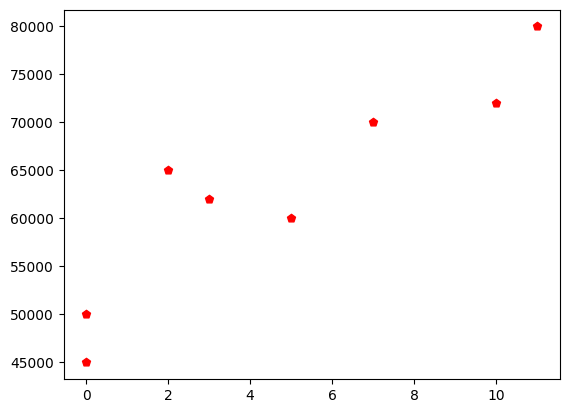

In [59]:
plt.scatter(df['experience'], df['salary($)'], color='red', marker='p')